# Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_for_eda.csv")
print(data.shape)
#print(data.columns.to_list())
data.head()

(446, 91)


,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,percentage_personen_0_tot_15_jaar,percentage_personen_15_tot_25_jaar,percentage_personen_25_tot_45_jaar,percentage_personen_45_tot_65_jaar,percentage_personen_65_jaar_en_ouder,percentage_ongehuwd,...,niet_westerse_migratieachtergrond,uit_marokko,uit_nederlandse_antillen_en_aruba,uit_suriname,uit_turkije,overige_nietwestersemigratieachtergrond,percentage_migratieachtergrond,migratieachtergrond,perc_mensen_van_nederland,mensen_van_nederland
0,18567,1115,650,465,4,13,50,25,9,77,...,211,0,11,33,11,144,54,602,46,512
1,7756,695,390,305,3,21,49,18,10,81,...,118,6,6,13,6,83,52,361,48,333
2,27483,1650,860,790,5,17,47,20,11,77,...,346,16,16,49,16,247,55,907,45,742
3,7360,370,205,165,6,17,51,20,7,77,...,40,3,0,3,7,29,49,181,51,188
4,8638,695,385,310,5,20,42,22,11,77,...,104,6,6,13,6,69,43,298,57,396


# High correlated columns
Let's create a correlation matrix and get the pairs of features which would show strong correlation (so they value of their correlation would be > 0.7):

<AxesSubplot: title={'center': 'Correlation of numeric factors'}>

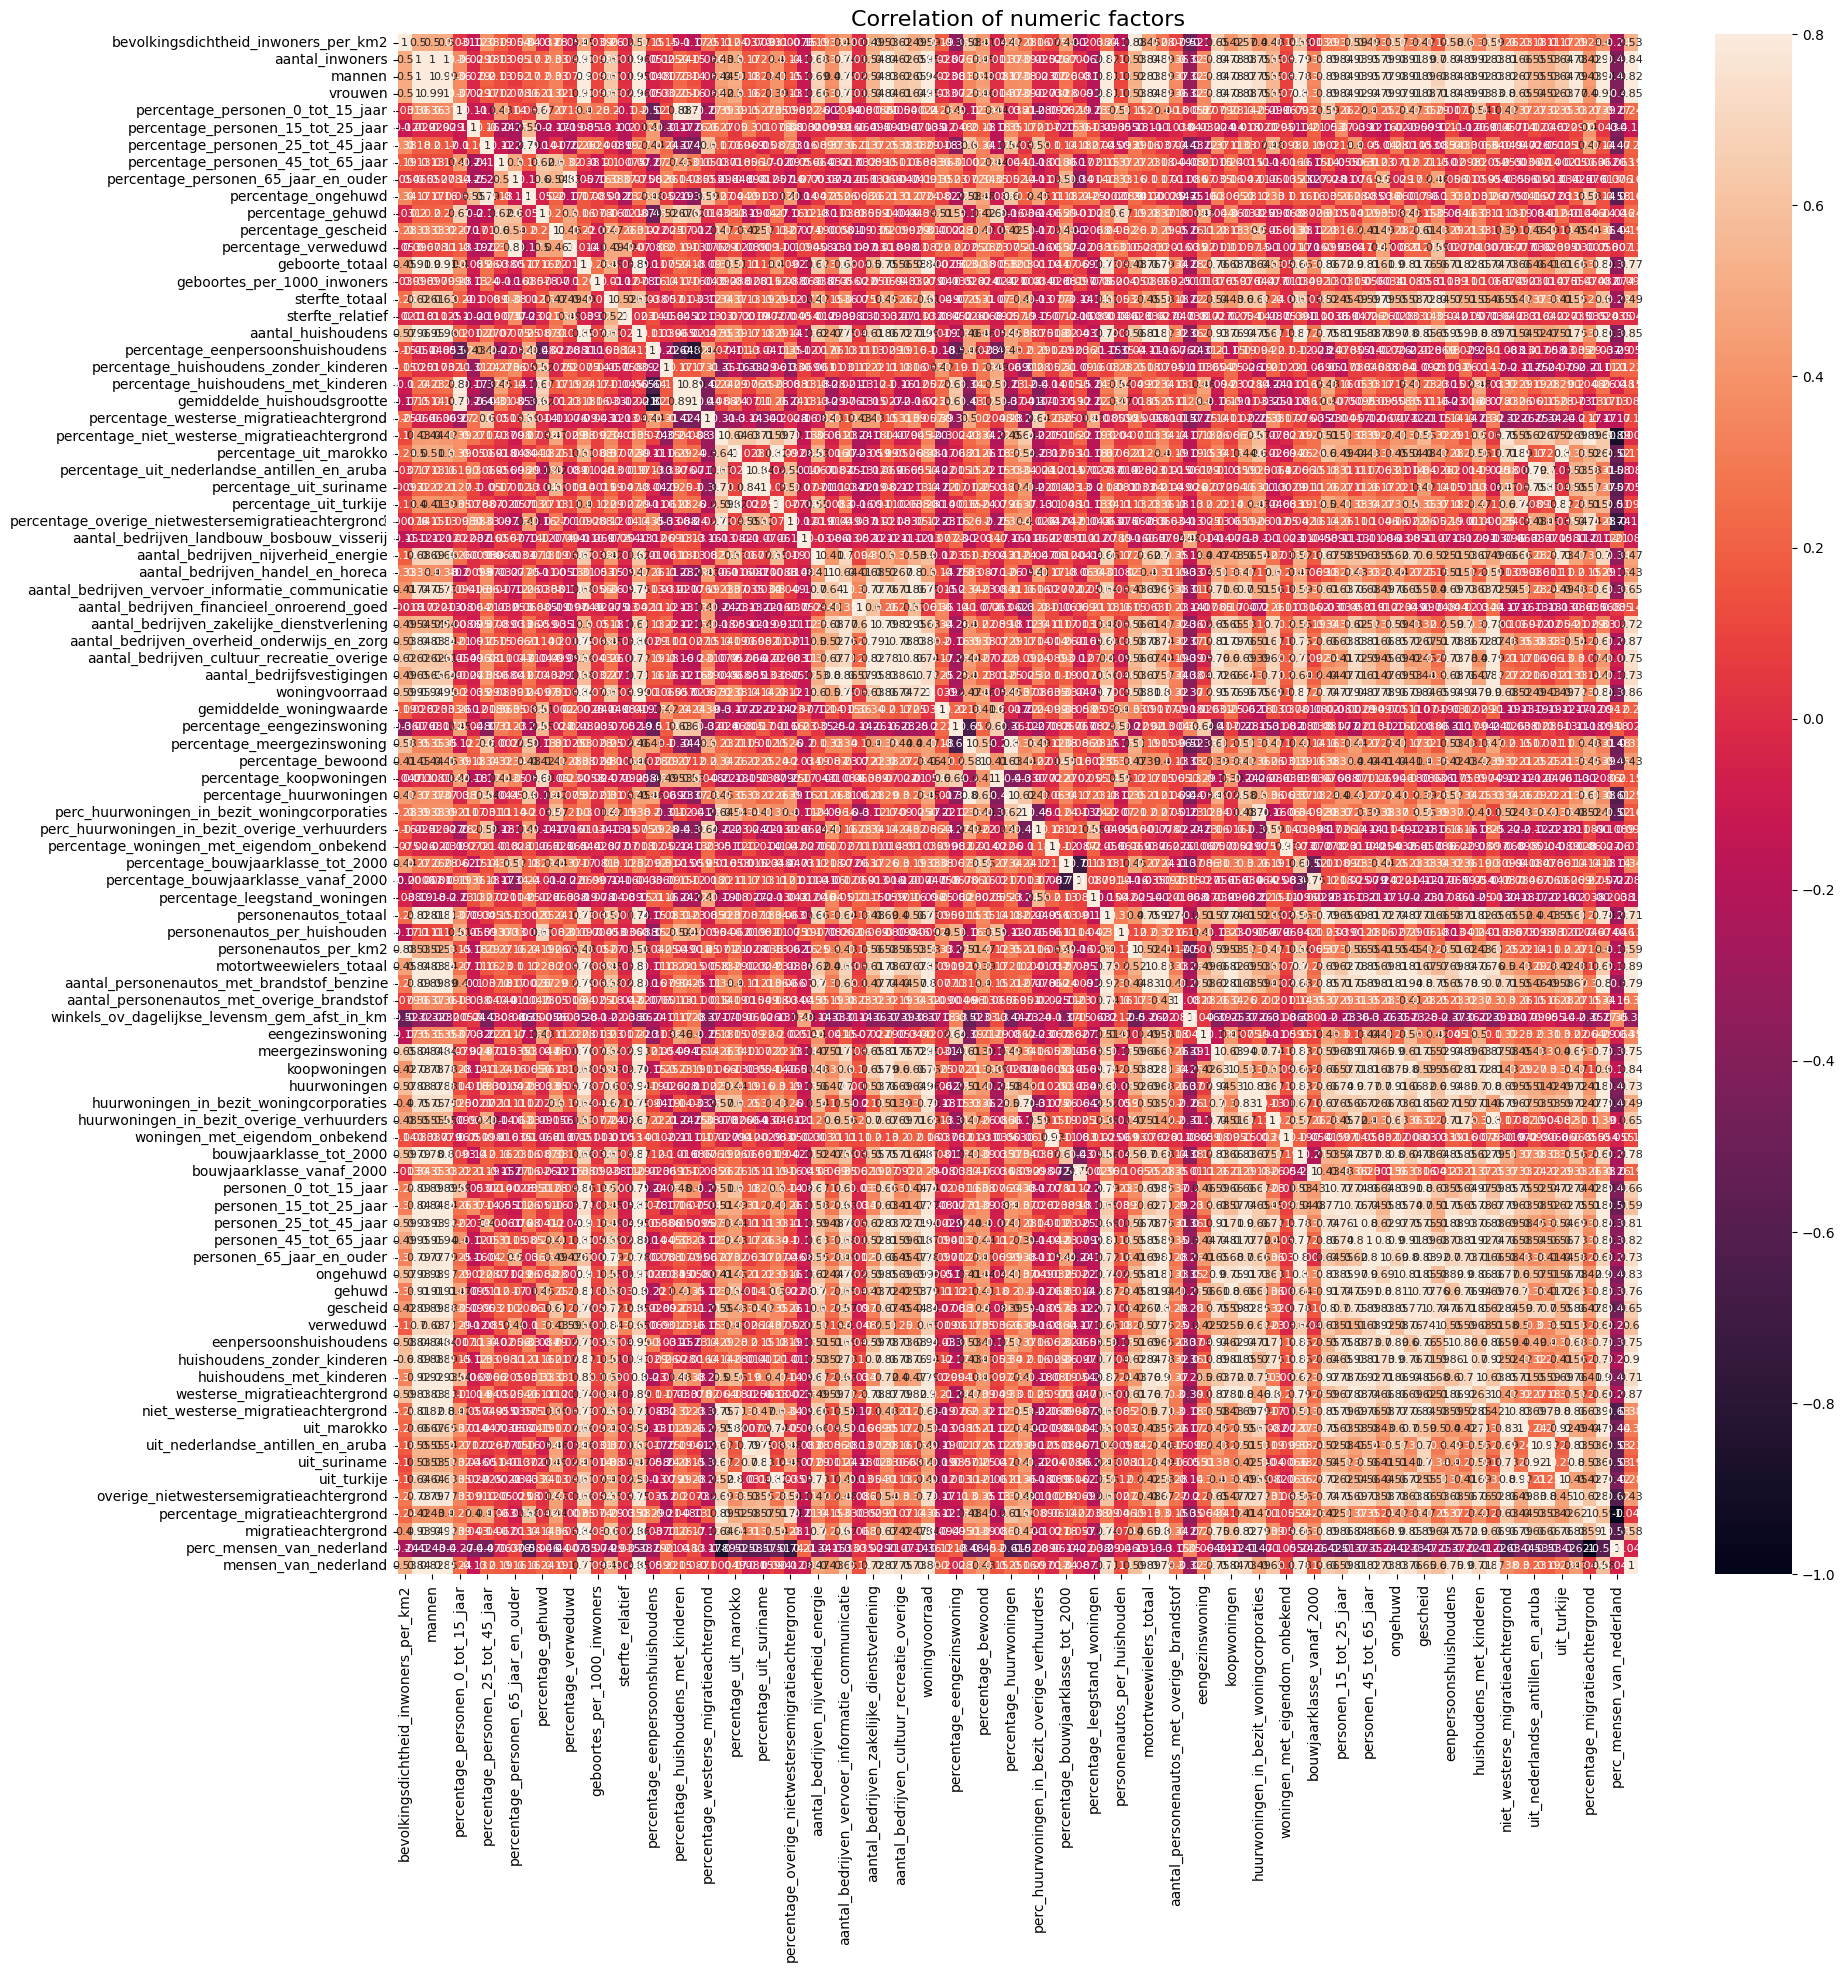

In [2]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (20,20))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_matrix, vmax = .8, annot_kws={'size': 8}, annot = True)

In [3]:
def print_highly_correlated(df, features, threshold_down=0.7, threshold_up=1.0):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr()
    correlated_features = np.where((np.abs(corr_df) < threshold_up) & (np.abs(corr_df) > threshold_down)) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold_down)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [4]:
columns = [ column for column in numeric_data.columns if column not in ['aantal_inwoners', 'vrouwen', 'mannen', 'woningvoorraad'] ]
print_highly_correlated(numeric_data, columns)

personen_0_tot_15_jaar and huishoudens_met_kinderen = 0.975
aantal_huishoudens and ongehuwd = 0.973
personen_25_tot_45_jaar and ongehuwd = 0.967
niet_westerse_migratieachtergrond and migratieachtergrond = 0.960
aantal_bedrijven_zakelijke_dienstverlening and aantal_bedrijfsvestigingen = 0.954
aantal_huishoudens and eenpersoonshuishoudens = 0.951
aantal_huishoudens and personen_25_tot_45_jaar = 0.947
aantal_huishoudens and huurwoningen = 0.944
meergezinswoning and huurwoningen = 0.943
huurwoningen and eenpersoonshuishoudens = 0.942
gehuwd and huishoudens_met_kinderen = 0.941
meergezinswoning and eenpersoonshuishoudens = 0.938
aantal_personenautos_met_brandstof_benzine and gehuwd = 0.938
aantal_huishoudens and huishoudens_zonder_kinderen = 0.935
aantal_huishoudens and meergezinswoning = 0.930
personen_25_tot_45_jaar and huishoudens_zonder_kinderen = 0.929
percentage_woningen_met_eigendom_onbekend and woningen_met_eigendom_onbekend = 0.927
personen_45_tot_65_jaar and huishoudens_met_kinder